In [1]:
import numpy as np
import pandas as pd
from neurom import viewer
from neurom.view import matplotlib_utils

from matplotlib import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import warnings
warnings.filterwarnings("ignore")

rcParams['pdf.fonttype']=42 # in order to save fonttype in AI
rcParams['ps.fonttype']=42

In [2]:
dataMorph = pd.read_csv('./dataMorph/morphFeatMatrix_labeled.csv' )
dataMorph = dataMorph.drop('cellTypeID',axis=1)
dataMorph

,Unnamed: 0,cellType_expert,predictClusterID,allBasalDenLen,apicalLen,axonDist,axonLen,centroid_allBasalDenY,centroid_apicalY,centroid_axonY,...,totalApicalVolume,totalAxonLength,totalAxonVolume,totalBasalLength,totalBasalSurfaceArea,totalBasalVolume,totalLen,totalSurfaceArea,totalVolume,totalAxonSurfaceArea
0,B112,PC_L5',8,1573.569723,2471.737105,2.492281,679.656167,-40.073408,182.565365,-81.289321,...,1452.852726,679.656132,112.952230,1573.569670,3379.445353,627.588079,4724.962995,10413.655550,2229.522436,982.193300
1,B15,PC_L6',8,768.102720,2121.989931,0.919874,179.515596,-18.156018,215.944276,-75.341351,...,1153.040061,179.515594,92.504333,768.102694,1970.483373,435.120017,3069.608247,7801.776757,1711.248169,456.811553
2,B154,PC_L5',8,3573.866010,2851.954476,0.000000,189.843234,-65.531695,129.438833,-72.495039,...,8388.612917,189.837616,279.842268,3573.845681,20466.481440,9415.182072,6615.663719,38444.124950,18318.863780,817.057703
3,B224,PC_L5',8,1184.024662,598.342024,0.000000,237.092296,46.424543,-20.543718,-63.791752,...,400.311993,237.092293,88.655462,1184.024666,3211.915594,1066.233344,2019.458982,5419.707400,1584.784306,513.944695
4,B55,PC_L5',8,967.222799,2026.918673,0.000000,47.808631,-33.121463,270.450831,-19.206011,...,1154.282421,47.808636,12.631419,967.222776,2584.927087,581.908382,3041.950102,7672.768624,1759.702103,87.113241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,s722,PC_L5',18,1390.448694,1203.991459,0.000000,121.033303,-80.376683,127.456794,-57.690645,...,1082.225143,121.033295,45.257749,1390.448693,3692.432813,884.374916,2715.473456,7828.057061,2050.223439,262.363755
162,s725,PC_L5',18,2161.712022,2429.440311,0.000000,66.087886,-67.492119,367.272940,-32.398086,...,2316.335561,66.087875,48.232372,2161.712045,4739.931023,874.023682,4657.240219,11984.399770,3257.442440,189.744714
163,s727,PC_L5',6,3309.298558,4598.691892,0.000000,112.109683,-74.294985,308.267710,-50.322418,...,4578.785066,112.109673,88.453375,3309.298612,6698.096619,1170.862221,8020.100133,20223.157880,7778.147988,347.307096
164,s732,',6,4575.900822,2557.163073,NaN,NaN,8.578133,199.092911,NaN,...,1461.848069,0.000000,0.000000,4575.900916,8849.595514,1460.721038,NaN,14831.570440,2951.127988,0.000000


In [3]:
dataMorph = dataMorph[ (dataMorph['cellType_expert'].str.startswith('PC') | dataMorph['cellType_expert'].str.startswith('VEN'))]

In [4]:
dataMorph

,Unnamed: 0,cellType_expert,predictClusterID,allBasalDenLen,apicalLen,axonDist,axonLen,centroid_allBasalDenY,centroid_apicalY,centroid_axonY,...,totalApicalVolume,totalAxonLength,totalAxonVolume,totalBasalLength,totalBasalSurfaceArea,totalBasalVolume,totalLen,totalSurfaceArea,totalVolume,totalAxonSurfaceArea
0,B112,PC_L5',8,1573.569723,2471.737105,2.492281,679.656167,-40.073408,182.565365,-81.289321,...,1452.852726,679.656132,112.952230,1573.569670,3379.445353,627.588079,4724.962995,10413.655550,2229.522436,982.193300
1,B15,PC_L6',8,768.102720,2121.989931,0.919874,179.515596,-18.156018,215.944276,-75.341351,...,1153.040061,179.515594,92.504333,768.102694,1970.483373,435.120017,3069.608247,7801.776757,1711.248169,456.811553
2,B154,PC_L5',8,3573.866010,2851.954476,0.000000,189.843234,-65.531695,129.438833,-72.495039,...,8388.612917,189.837616,279.842268,3573.845681,20466.481440,9415.182072,6615.663719,38444.124950,18318.863780,817.057703
3,B224,PC_L5',8,1184.024662,598.342024,0.000000,237.092296,46.424543,-20.543718,-63.791752,...,400.311993,237.092293,88.655462,1184.024666,3211.915594,1066.233344,2019.458982,5419.707400,1584.784306,513.944695
4,B55,PC_L5',8,967.222799,2026.918673,0.000000,47.808631,-33.121463,270.450831,-19.206011,...,1154.282421,47.808636,12.631419,967.222776,2584.927087,581.908382,3041.950102,7672.768624,1759.702103,87.113241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,s720,PC_L5',6,4321.133802,4114.339777,0.000000,1785.405343,-48.360173,272.341270,-208.901429,...,4036.802153,1785.405334,716.630668,4321.133775,13487.684900,3790.144077,10220.878920,30770.210030,9232.058339,3745.261104
161,s722,PC_L5',18,1390.448694,1203.991459,0.000000,121.033303,-80.376683,127.456794,-57.690645,...,1082.225143,121.033295,45.257749,1390.448693,3692.432813,884.374916,2715.473456,7828.057061,2050.223439,262.363755
162,s725,PC_L5',18,2161.712022,2429.440311,0.000000,66.087886,-67.492119,367.272940,-32.398086,...,2316.335561,66.087875,48.232372,2161.712045,4739.931023,874.023682,4657.240219,11984.399770,3257.442440,189.744714
163,s727,PC_L5',6,3309.298558,4598.691892,0.000000,112.109683,-74.294985,308.267710,-50.322418,...,4578.785066,112.109673,88.453375,3309.298612,6698.096619,1170.862221,8020.100133,20223.157880,7778.147988,347.307096


In [5]:
importFeatures = ['allBasalDenLen','apicalLen','axonDist','centroid_allBasalDenY','centroid_apicalY','height','maxBasalRadius','somaSize','somaRatio1','somaRatio2','topForkPercent','topApicalLen','thickRatio','somaDepth_norm']
dataMorph_new = dataMorph[importFeatures]
dataMorph_new

,allBasalDenLen,apicalLen,axonDist,centroid_allBasalDenY,centroid_apicalY,height,maxBasalRadius,somaSize,somaRatio1,somaRatio2,topForkPercent,topApicalLen,thickRatio,somaDepth_norm
0,1573.569723,2471.737105,2.492281,-40.073408,182.565365,784.30,1.73,959.055365,0.337079,1.100541,0.055556,190.0,2.132948,0.796460
1,768.102720,2121.989931,0.919874,-18.156018,215.944276,683.30,1.96,1017.420421,0.510989,1.261533,0.153846,212.0,1.117347,0.922995
2,3573.866010,2851.954476,0.000000,-65.531695,129.438833,48.57,3.09,1401.302999,0.587549,1.473124,0.000000,0.0,1.110032,0.758427
3,1184.024662,598.342024,0.000000,46.424543,-20.543718,73.11,3.11,465.166367,0.355422,0.953607,0.000000,9.0,0.482315,0.823684
4,967.222799,2026.918673,0.000000,-33.121463,270.450831,794.80,1.73,771.607776,0.508197,1.112362,0.000000,127.0,1.601156,0.740607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,4321.133802,4114.339777,0.000000,-48.360173,272.341270,1081.58,5.79,2656.693908,0.377163,1.453893,0.000000,175.0,0.576857,0.517539
161,1390.448694,1203.991459,0.000000,-80.376683,127.456794,681.25,2.75,658.849593,0.430556,1.385999,0.000000,236.0,0.956364,0.569414
162,2161.712022,2429.440311,0.000000,-67.492119,367.272940,1243.40,1.72,2535.524861,0.394737,1.536195,0.000000,530.0,2.662791,0.571755
163,3309.298558,4598.691892,0.000000,-74.294985,308.267710,1253.20,2.76,1445.124879,0.351562,1.562226,0.000000,584.0,1.876812,0.560897


In [6]:
dataMorph_new = StandardScaler().fit_transform(dataMorph_new)  # scale the data (normalize and standard ...)
imputer = KNNImputer(n_neighbors=2, weights="uniform")
dataMorph_new = imputer.fit_transform(dataMorph_new)

data_Feat = dataMorph_new.copy()
X_pca = PCA().fit_transform(data_Feat)
X_tsne = TSNE(learning_rate=100,random_state=20,metric='euclidean').fit_transform(X_pca)
X_umap = umap.UMAP(n_neighbors=10, min_dist=0.2, n_components=3,random_state=20).fit_transform(X_pca)

In [7]:
clusterLabel = np.zeros(dataMorph_new.shape[0])                            # default 0: PC _L23
clusterLabel[ dataMorph['cellType_expert'].str.contains('L5') ] = 1        # 1: PC_L
clusterLabel[ (dataMorph['cellType_expert'].str.contains('L5')) & (dataMorph['predictClusterID']==16) ] = 2        # 2:L5_ET
clusterLabel[ (dataMorph['cellType_expert'].str.contains('L5')) & (dataMorph['predictClusterID']==8) ] = 3        # 2:L5_ET
clusterLabel[ dataMorph['cellType_expert'].str.contains('L6') ] = 4        # 3: L6PC
clusterLabel[ (dataMorph['cellType_expert'].str.contains('L6')) & (dataMorph['predictClusterID']==8) ] = 3        # 2:L5_ET
clusterLabel[ dataMorph['cellType_expert'].str.contains('Long') ] = 5      # 4: VEN-L
clusterLabel[ dataMorph['cellType_expert'].str.contains('Short') ] = 6     # 5:VEN-S


clusterLabel

array([3., 3., 3., 3., 3., 5., 1., 2., 1., 3., 1., 1., 1., 5., 1., 2., 2.,
       3., 1., 1., 1., 4., 1., 1., 6., 0., 4., 4., 1., 1., 2., 1., 6., 6.,
       4., 3., 3., 0., 6., 6., 4., 3., 1., 2., 0., 0., 1., 0., 1., 0., 6.,
       0., 1., 0., 1., 0., 4., 4., 4., 4., 0., 2., 2., 1., 1., 0., 0., 1.,
       0., 6., 0., 0., 0., 0., 0., 2., 0., 0., 5., 5., 1., 4., 1., 1., 1.,
       0., 5., 1., 1., 6., 6., 6., 5., 5., 1., 2., 2., 6., 4., 4., 1., 1.,
       4., 1., 1., 1., 1., 6., 1., 1., 0., 1., 1., 1., 1., 1., 5., 5., 1.,
       1., 5., 1., 1., 1., 4., 1., 1., 1., 1., 1.])

In [8]:
cellTypeColors = np.array(['#167C3B','#46629D','#3AB9BD','#959C4E','#0BF81C','#E60012','#FFA500'])
# cellTypeColors = np.array([[0.4784 ,   0.5647 ,   0.8235], 
#       [0.0824 ,   0.0824 ,   0.8275], 
#       [0 ,        0.6510 ,   0.7765], 
#       [0.5255 ,   0.7569 ,   0.4000], 
#       [1.0000 ,   0.2784 ,   0.8196], 
#       [0.8255 ,   0.1569 ,   0.4000], 
#       [0.1255 ,   0.6569 ,   0.7000],
#       [0.2233 ,   0.8784 ,   0.1196], 
#       [1.0000 ,   0.2196 ,   0.2196]])

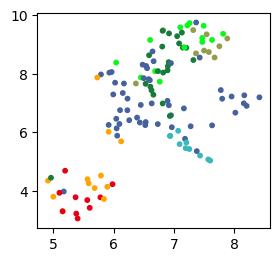

In [9]:
plt.figure(figsize=(3, 2.8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = cellTypeColors[clusterLabel.astype(int)],s=10)
# plt.show()
# plt.savefig('./figures/morphCluster.pdf',dpi=300)

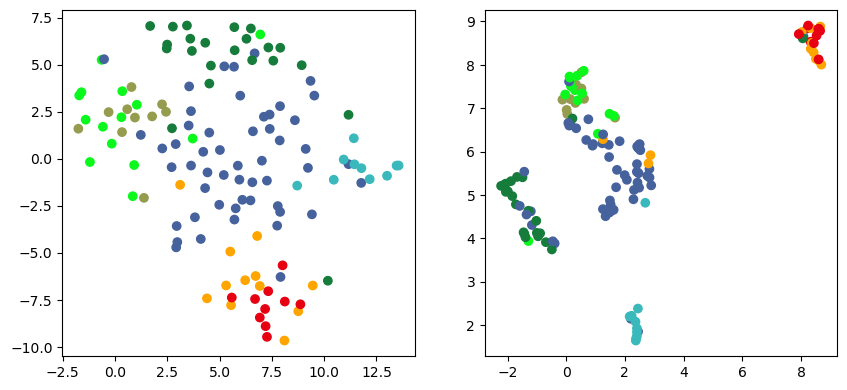

In [10]:
X_umap = umap.UMAP(n_neighbors=5, min_dist=0.01, n_components=5,random_state=20).fit_transform(X_pca)

plt.figure(figsize=(10, 4.5))
plt.subplot(121)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = cellTypeColors[clusterLabel.astype(int)])
plt.subplot(122)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = cellTypeColors[clusterLabel.astype(int)])
plt.show()
# plt.savefig('./figs/morphCluster.pdf')

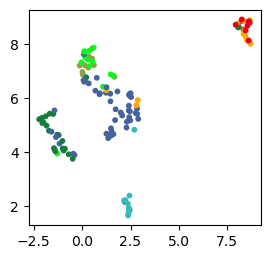

In [11]:
plt.figure(figsize=(3, 2.8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = cellTypeColors[clusterLabel.astype(int)],s=10)
# plt.show()
# plt.savefig('./figures/morphCluster.pdf',dpi=300)

In [12]:
cellTypeColors = np.array(['#167C3B','#46629D','#3AB9BD','#959C4E','#0BF81C','#C0D9D9','#E60012'])

clusterLabel = np.zeros(dataMorph_new.shape[0])                            # default 0: PC _L23
clusterLabel[ dataMorph['predictClusterID'].isin([0,2,7,13,19]) ] = 3        # RORB
clusterLabel[ dataMorph['predictClusterID'].isin([1,5,15]) ] = 0        # 1: PC_L
clusterLabel[ dataMorph['predictClusterID'].isin([3,6,9,11,14,18]) ] = 1        # RORB
clusterLabel[ (dataMorph['cellType_expert'].str.contains('L5')) & (dataMorph['predictClusterID']==16) ] = 2        # 2:L5_ET
clusterLabel[ (dataMorph['cellType_expert'].str.contains('L5')) & (dataMorph['predictClusterID']==8) ] = 5        # 2:L5_ET
clusterLabel[ dataMorph['predictClusterID'].isin([4,12,17]) ] = 4        # 3: L6PC
clusterLabel[ dataMorph['cellType_expert'].str.contains('Long') ] = 6      # 4: VEN-L
clusterLabel[ dataMorph['cellType_expert'].str.contains('Short') ] = 6     # 5:VEN-S


clusterLabel

array([5., 0., 5., 5., 5., 6., 1., 2., 3., 5., 1., 1., 1., 6., 1., 2., 2.,
       5., 3., 1., 1., 4., 3., 1., 6., 0., 4., 3., 1., 1., 2., 1., 6., 6.,
       4., 5., 0., 0., 6., 6., 4., 5., 1., 2., 0., 0., 3., 0., 3., 3., 6.,
       3., 1., 0., 1., 3., 4., 4., 4., 4., 3., 2., 2., 1., 3., 0., 0., 3.,
       3., 6., 3., 0., 0., 0., 0., 2., 0., 0., 6., 6., 1., 4., 1., 1., 1.,
       0., 6., 1., 1., 6., 6., 6., 6., 6., 1., 2., 2., 6., 4., 4., 1., 1.,
       4., 1., 1., 3., 1., 6., 0., 1., 0., 1., 1., 1., 1., 1., 6., 6., 1.,
       1., 6., 1., 1., 1., 4., 1., 1., 1., 1., 1.])

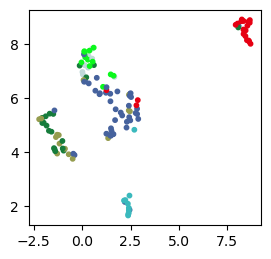

In [13]:
# plt.figure(figsize=(8, 8))
plt.figure(figsize=(3, 2.8))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = cellTypeColors[clusterLabel.astype(int)],s=10)
# plt.show()
# plt.savefig('./figures/morphCluster_RNAtype.pdf',dpi=300)